In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
train_data = pd.read_csv('/content/drive/MyDrive/Task 1/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Task 1/test.csv')

In [16]:
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
# Handling missing values (simplified for brevity)
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

In [18]:
# Convert categorical variables to numeric (simplified)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

# Ensure both datasets have the same columns after getting dummies
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [19]:
# Select relevant features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_split, y_train_split)

LinearRegression()

In [21]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val_split)

# Evaluate the model
mae = mean_absolute_error(y_val_split, y_val_pred)
mse = mean_squared_error(y_val_split, y_val_pred)
r2 = r2_score(y_val_split, y_val_pred)

print(f"Validation Mean Absolute Error: {mae}")
print(f"Validation Mean Squared Error: {mse}")
print(f"Validation R-squared: {r2}")

Validation Mean Absolute Error: 36018.563138363446
Validation Mean Squared Error: 2810942965.2180653
Validation R-squared: 0.6335301929422245


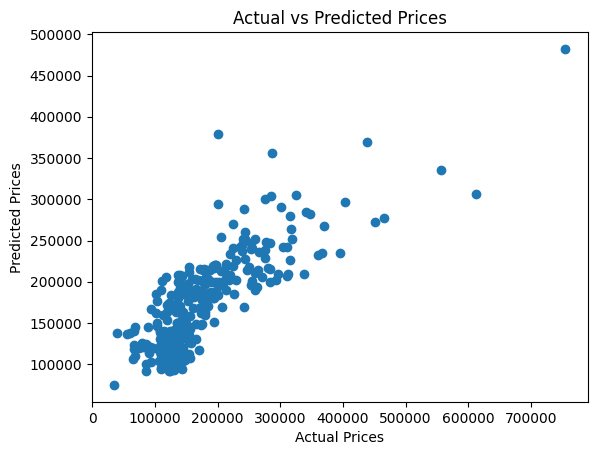

In [22]:
# Visualize the results
plt.scatter(y_val_split, y_val_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [23]:
# Make predictions on the test dataset
test_predictions = model.predict(X_test)

# Save the predictions and corresponding features to a CSV file
test_data['Predicted_SalePrice'] = test_predictions
output_columns = features + ['Predicted_SalePrice']
test_data[output_columns].to_csv('house_price_predictions.csv', index=False)

print("Predictions saved to house_price_predictions.csv")

Predictions saved to house_price_predictions.csv
